In [1]:
import pandas as pd
import numpy as np
import os

from datetime import datetime, timedelta
import pdb
import pandas as pd
import math

In [2]:
ce = pd.read_csv("Banknifty_CE.csv")
ce.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume", "Open Interest": "oi"}, inplace = True)

In [3]:
pe = pd.read_csv("Banknifty_PE.csv")
pe.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume", "Open Interest": "oi"}, inplace = True)

In [4]:
pe

,Ticker,Date,Time,open,high,low,close,volume,oi
0,BANKNIFTY05AUG2135200PE.NFO,02-08-2021,09:15:59,555.35,573.90,507.15,533.10,2175,20550
1,BANKNIFTY05AUG2135200PE.NFO,02-08-2021,09:16:59,526.40,554.15,526.40,530.00,2500,20550
2,BANKNIFTY05AUG2135200PE.NFO,02-08-2021,09:17:59,530.00,530.00,505.00,505.00,4425,23875
3,BANKNIFTY05AUG2135200PE.NFO,02-08-2021,09:18:59,502.45,508.90,492.05,498.80,7150,23875
4,BANKNIFTY05AUG2135200PE.NFO,02-08-2021,09:19:59,499.60,499.60,481.75,485.75,4375,23875
...,...,...,...,...,...,...,...,...,...
1496,BANKNIFTY05AUG2135200PE.NFO,05-08-2021,15:25:59,0.10,0.20,0.10,0.15,39500,457050
1497,BANKNIFTY05AUG2135200PE.NFO,05-08-2021,15:26:59,0.10,0.20,0.05,0.10,43275,457050
1498,BANKNIFTY05AUG2135200PE.NFO,05-08-2021,15:27:59,0.05,0.15,0.05,0.15,13425,457050
1499,BANKNIFTY05AUG2135200PE.NFO,05-08-2021,15:28:59,0.05,0.15,0.05,0.05,33100,403025


In [5]:
ce['Date']

0       02-08-2021
1       02-08-2021
2       02-08-2021
3       02-08-2021
4       02-08-2021
           ...    
1496    05-08-2021
1497    05-08-2021
1498    05-08-2021
1499    05-08-2021
1500    05-08-2021
Name: Date, Length: 1501, dtype: object

In [6]:
pe = pd.read_csv("Banknifty_PE.csv")
pe.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume", "Open Interest": "oi"}, inplace = True)

pe

ce['Date']

0       02-08-2021
1       02-08-2021
2       02-08-2021
3       02-08-2021
4       02-08-2021
           ...    
1496    05-08-2021
1497    05-08-2021
1498    05-08-2021
1499    05-08-2021
1500    05-08-2021
Name: Date, Length: 1501, dtype: object

In [7]:
def dt_transform(date):
    return date[-4:] + "-" + date[3:5] + "-" + date[:2]
ce['Date'] = ce['Date'].apply(dt_transform)
pe['Date'] = pe['Date'].apply(dt_transform)

In [8]:
#bnk['timestamp'] = bnk['Date'] + ' ' + bnk['Time'] + '+05:30'

In [9]:
ce['timestamp'] = ce['Date'] + ' ' + ce['Time'] + '+00:00'
pe['timestamp'] = pe['Date'] + ' ' + pe['Time'] + '+00:00'

In [10]:
ce

,Ticker,Date,Time,open,high,low,close,volume,oi,timestamp
0,BANKNIFTY05AUG2135200CE.NFO,2021-08-02,09:15:59,90.45,137.10,86.60,101.50,135800,518250,2021-08-02 09:15:59+00:00
1,BANKNIFTY05AUG2135200CE.NFO,2021-08-02,09:16:59,101.65,102.65,95.20,101.85,88625,518250,2021-08-02 09:16:59+00:00
2,BANKNIFTY05AUG2135200CE.NFO,2021-08-02,09:17:59,102.00,109.60,99.80,109.60,80650,566975,2021-08-02 09:17:59+00:00
3,BANKNIFTY05AUG2135200CE.NFO,2021-08-02,09:18:59,109.85,110.15,106.40,108.65,67800,566975,2021-08-02 09:18:59+00:00
4,BANKNIFTY05AUG2135200CE.NFO,2021-08-02,09:19:59,107.80,110.20,106.55,110.20,54400,566975,2021-08-02 09:19:59+00:00
...,...,...,...,...,...,...,...,...,...,...
1496,BANKNIFTY05AUG2135200CE.NFO,2021-08-05,15:25:59,632.95,637.00,632.95,635.00,825,97725,2021-08-05 15:25:59+00:00
1497,BANKNIFTY05AUG2135200CE.NFO,2021-08-05,15:26:59,635.00,636.15,633.35,635.00,1175,97725,2021-08-05 15:26:59+00:00
1498,BANKNIFTY05AUG2135200CE.NFO,2021-08-05,15:27:59,635.00,635.00,632.05,634.35,1725,97725,2021-08-05 15:27:59+00:00
1499,BANKNIFTY05AUG2135200CE.NFO,2021-08-05,15:28:59,633.50,634.95,632.10,634.95,575,92450,2021-08-05 15:28:59+00:00


In [11]:
ce['timestamp'] = pd.to_datetime(ce['timestamp'])
pe['timestamp'] = pd.to_datetime(pe['timestamp'])

In [12]:
ce.drop(columns = ['Ticker', 'Date', 'Time'], inplace = True)
pe.drop(columns = ['Ticker', 'Date', 'Time'], inplace = True)

In [13]:
ce.set_index('timestamp', inplace = True)
pe.set_index('timestamp', inplace = True)

In [14]:
ce

,open,high,low,close,volume,oi
timestamp,,,,,,
2021-08-02 09:15:59+00:00,90.45,137.10,86.60,101.50,135800,518250
2021-08-02 09:16:59+00:00,101.65,102.65,95.20,101.85,88625,518250
2021-08-02 09:17:59+00:00,102.00,109.60,99.80,109.60,80650,566975
2021-08-02 09:18:59+00:00,109.85,110.15,106.40,108.65,67800,566975
2021-08-02 09:19:59+00:00,107.80,110.20,106.55,110.20,54400,566975
...,...,...,...,...,...,...
2021-08-05 15:25:59+00:00,632.95,637.00,632.95,635.00,825,97725
2021-08-05 15:26:59+00:00,635.00,636.15,633.35,635.00,1175,97725
2021-08-05 15:27:59+00:00,635.00,635.00,632.05,634.35,1725,97725


In [15]:
pe

,open,high,low,close,volume,oi
timestamp,,,,,,
2021-08-02 09:15:59+00:00,555.35,573.90,507.15,533.10,2175,20550
2021-08-02 09:16:59+00:00,526.40,554.15,526.40,530.00,2500,20550
2021-08-02 09:17:59+00:00,530.00,530.00,505.00,505.00,4425,23875
2021-08-02 09:18:59+00:00,502.45,508.90,492.05,498.80,7150,23875
2021-08-02 09:19:59+00:00,499.60,499.60,481.75,485.75,4375,23875
...,...,...,...,...,...,...
2021-08-05 15:25:59+00:00,0.10,0.20,0.10,0.15,39500,457050
2021-08-05 15:26:59+00:00,0.10,0.20,0.05,0.10,43275,457050
2021-08-05 15:27:59+00:00,0.05,0.15,0.05,0.15,13425,457050


In [16]:
cash = input('Input the cash you want to assume during backtesting - ')
brokerage = input('Input the brokerage you want to assume during backtesting - ')

Input the cash you want to assume during backtesting - 1000000
Input the brokerage you want to assume during backtesting - 0.04


<IPython.core.display.Javascript object>


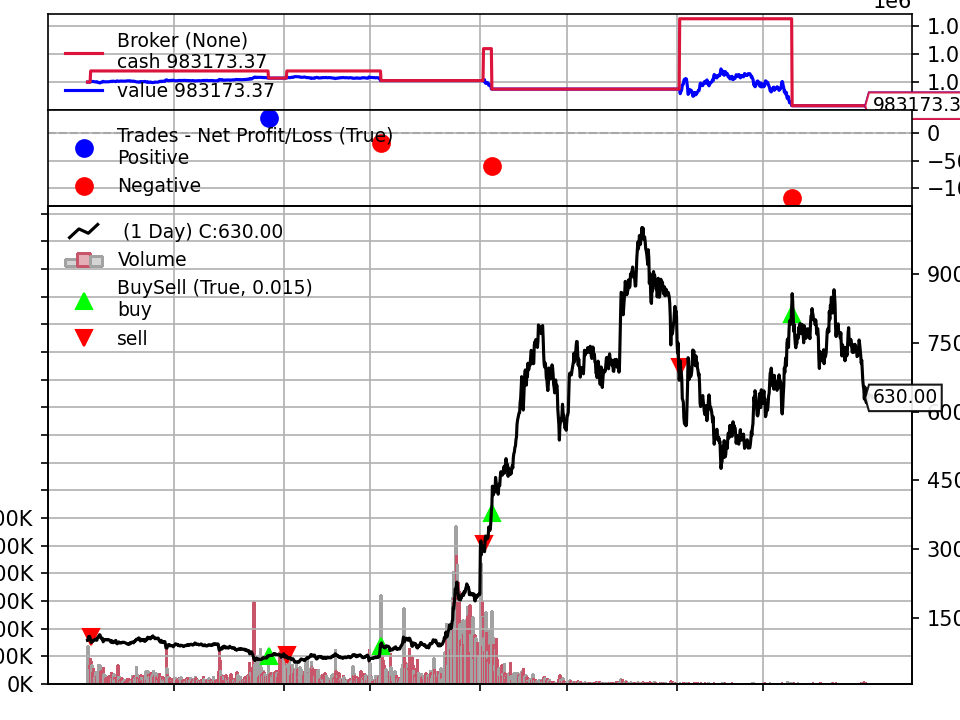

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              4              1              3              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               25.0           1              3              -16826.63      
SQN: -1.56
Starting Portfolio Value: 1000000.000000
Final Portfolio Value: 983173.367500
PnL: -16826.63
Sharpe Ratio:  -14.953058629264609


In [20]:
from datetime import datetime
import backtrader as bt

class ShortStraddle(bt.Strategy):
    
    
    def __init__(self):
        
        # ----------------------------------------------------------------------------------------
        # Declare all the variables required in the strategy here
        
        self.dataclose = self.datas[0].close
        self.order = None
        self.price = None
        
        # ----------------------------------------------------------------------------------------
        
        
        self.Statistics = pd.DataFrame(columns = ['Trade Open', 'Trade Close', 'Gross PnL', 'Net PnL', 'MaxDrawDown'])

    
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        #print(f'{dt.isoformat()} {txt}') #Print date and close #Print date and close
    
    def next(self):
        #self.log('Close, %.2f' % self.dataclose[0])
        
        # ----------------------------------------------------------------------------------------
        # Write the strategy logic here

        if self.order:
            return
        if str(self.data.datetime.time()) == '09:20:59':
            self.price = self.dataclose[0]
            self.order = self.sell(size = 75)
        if self.position:
            if str(self.data.datetime.time()) == '15:00:59':
                self.order = self.buy(size = 75)
                
            elif self.dataclose[0] > 1.2*self.price:
                self.order = self.buy(size = 75)
                
        # ----------------------------------------------------------------------------------------
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
        # An active Buy/Sell order has been submitted/accepted - Nothing to do
            return

    # Check if an order has been completed
    # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED, {order.executed.price:.2f}')
            elif order.issell():
                self.log(f'SELL EXECUTED, {order.executed.price:.2f}')
            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Reset orders
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        d1 = str(bt.num2date(trade.dtopen)) + '+05:30'
        d2 = str(bt.num2date(trade.dtclose)) + '+05:30'
        C = pe['close']
        D = C.loc[d1:d2]
        maxdd = max_dd(D)
        if math.isnan(maxdd):
            self.Statistics.loc[len(self.Statistics.index)] = [d1, d2, trade.pnl, trade.pnlcomm, "Data Missing"]
        else:
            self.Statistics.loc[len(self.Statistics.index)] = [d1, d2, trade.pnl, trade.pnlcomm, maxdd]

def max_dd(ser):
    max2here = ser.cummax()
    dd2here = (ser - max2here)/max2here
    return abs(dd2here.min()*100)

def printTradeAnalysis(analyzer):
    total_open = analyzer.total.open
    total_closed = analyzer.total.closed
    total_won = analyzer.won.total
    total_lost = analyzer.lost.total
    win_streak = analyzer.streak.won.longest
    lose_streak = analyzer.streak.lost.longest
    pnl_net = round(analyzer.pnl.net.total,2)
    strike_rate = round((total_won / total_closed) * 100, 2)
    #Designate the rows
    h1 = ['Total Open', 'Total Closed', 'Total Won', 'Total Lost']
    h2 = ['Strike Rate','Win Streak', 'Losing Streak', 'PnL Net']
    r1 = [total_open, total_closed,total_won,total_lost]
    r2 = [strike_rate, win_streak, lose_streak, pnl_net]
    #Check which set of headers is the longest.
    if len(h1) > len(h2):
        header_length = len(h1)
    else:
        header_length = len(h2)
    #Print the rows
    print_list = [h1,r1,h2,r2]
    row_format ="{:<15}" * (header_length + 1)
    print("Trade Analysis Results:")
    for row in print_list:
        print(row_format.format('',*row))

def printSQN(analyzer):
    sqn = round(analyzer.sqn,2)
    print('SQN: {}'.format(sqn))

cerebro = bt.Cerebro()
cerebro.addstrategy(ShortStraddle)

data = bt.feeds.PandasData(dataname = ce)
cerebro.adddata(data)
cerebro.broker.setcash(int(cash))
cerebro.broker.setcommission(commission = (float(brokerage))/100)

cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")
cerebro.addsizer(bt.sizers.SizerFix, stake=3)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, timeframe=bt.TimeFrame.Days, compression=1, factor=365, annualize=True)

if __name__ == '__main__':
    # Run Cerebro Engine
    start_portfolio_value = cerebro.broker.getvalue()

    strategies = cerebro.run()
    firstStrat = strategies[0]
    #b = Bokeh(style='bar', plot_mode='single')
    cerebro.plot()
    
    #print(firstStrat.Statistics)
    printTradeAnalysis(firstStrat.analyzers.ta.get_analysis())
    printSQN(firstStrat.analyzers.sqn.get_analysis())

    end_portfolio_value = cerebro.broker.getvalue()
    pnl = end_portfolio_value - start_portfolio_value
    print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
    print(f'Final Portfolio Value: {end_portfolio_value:2f}')
    print(f'PnL: {pnl:.2f}')
    print('Sharpe Ratio: ', firstStrat.analyzers.sharperatio.get_analysis()['sharperatio'])

In [18]:
firstStrat.Statistics['CumSum'] = firstStrat.Statistics['Net PnL'].cumsum()
ce_leg = firstStrat.Statistics
ce_leg

,Trade Open,Trade Close,Gross PnL,Net PnL,MaxDrawDown,CumSum
0,2021-08-02 09:21:59+05:30,2021-08-02 15:01:59+05:30,2820.00,2814.7980,8.88201,2814.7980
1,2021-08-03 09:21:59+05:30,2021-08-03 12:21:59+05:30,-1751.25,-1756.0305,Data Missing,1058.7675
2,2021-08-04 09:21:59+05:30,2021-08-04 09:37:59+05:30,-6037.50,-6058.1130,Data Missing,-4999.3455
3,2021-08-05 09:21:59+05:30,2021-08-05 12:56:59+05:30,-11782.50,-11827.2870,Data Missing,-16826.6325


<IPython.core.display.Javascript object>


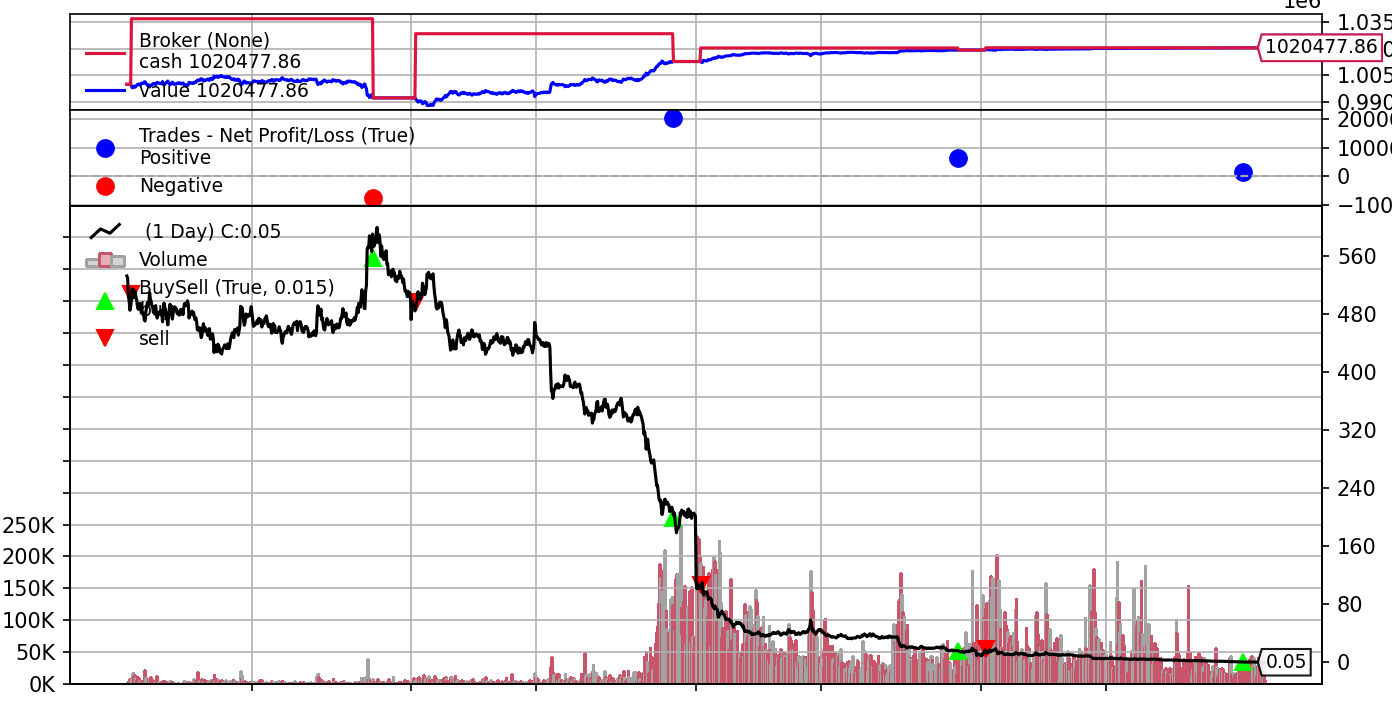

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              4              3              1              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               75.0           3              1              20477.86       
SQN: 1.01
Starting Portfolio Value: 1000000.000000
Final Portfolio Value: 1020477.856000
PnL: 20477.86
Sharpe Ratio:  9.551043077897438


In [19]:
from datetime import datetime
import backtrader as bt

class ShortStraddle(bt.Strategy):
    
    
    def __init__(self):
        
        # ----------------------------------------------------------------------------------------
        # Declare all the variables required in the strategy here
        
        self.dataclose = self.datas[0].close
        self.order = None
        self.price = None
        
        # ----------------------------------------------------------------------------------------
        
        
        self.Statistics = pd.DataFrame(columns = ['Trade Open', 'Trade Close', 'Gross PnL', 'Net PnL', 'MaxDrawDown'])

    
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        #print(f'{dt.isoformat()} {txt}') #Print date and close #Print date and close
    
    def next(self):
        #self.log('Close, %.2f' % self.dataclose[0])
        
        # ----------------------------------------------------------------------------------------
        # Write the strategy logic here

        if self.order:
            return
        if str(self.data.datetime.time()) == '09:20:59':
            self.price = self.dataclose[0]
            self.order = self.sell(size = 75)
        if self.position:
            if str(self.data.datetime.time()) == '15:00:59':
                self.order = self.buy(size = 75)
                
            elif self.dataclose[0] > 1.2*self.price:
                self.order = self.buy(size = 75)
                
        # ----------------------------------------------------------------------------------------
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
        # An active Buy/Sell order has been submitted/accepted - Nothing to do
            return

    # Check if an order has been completed
    # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED, {order.executed.price:.2f}')
            elif order.issell():
                self.log(f'SELL EXECUTED, {order.executed.price:.2f}')
            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Reset orders
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        d1 = str(bt.num2date(trade.dtopen)) + '+05:30'
        d2 = str(bt.num2date(trade.dtclose)) + '+05:30'
        C = pe['close']
        D = C.loc[d1:d2]
        maxdd = max_dd(D)
        if math.isnan(maxdd):
            self.Statistics.loc[len(self.Statistics.index)] = [d1, d2, trade.pnl, trade.pnlcomm, "Data Missing"]
        else:
            self.Statistics.loc[len(self.Statistics.index)] = [d1, d2, trade.pnl, trade.pnlcomm, maxdd]

def max_dd(ser):
    max2here = ser.cummax()
    dd2here = (ser - max2here)/max2here
    return abs(dd2here.min()*100)

def printTradeAnalysis(analyzer):
    total_open = analyzer.total.open
    total_closed = analyzer.total.closed
    total_won = analyzer.won.total
    total_lost = analyzer.lost.total
    win_streak = analyzer.streak.won.longest
    lose_streak = analyzer.streak.lost.longest
    pnl_net = round(analyzer.pnl.net.total,2)
    strike_rate = round((total_won / total_closed) * 100, 2)
    #Designate the rows
    h1 = ['Total Open', 'Total Closed', 'Total Won', 'Total Lost']
    h2 = ['Strike Rate','Win Streak', 'Losing Streak', 'PnL Net']
    r1 = [total_open, total_closed,total_won,total_lost]
    r2 = [strike_rate, win_streak, lose_streak, pnl_net]
    #Check which set of headers is the longest.
    if len(h1) > len(h2):
        header_length = len(h1)
    else:
        header_length = len(h2)
    #Print the rows
    print_list = [h1,r1,h2,r2]
    row_format ="{:<15}" * (header_length + 1)
    print("Trade Analysis Results:")
    for row in print_list:
        print(row_format.format('',*row))

def printSQN(analyzer):
    sqn = round(analyzer.sqn,2)
    print('SQN: {}'.format(sqn))

cerebro = bt.Cerebro()
cerebro.addstrategy(ShortStraddle)

data = bt.feeds.PandasData(dataname = pe)
cerebro.adddata(data)
cerebro.broker.setcash(int(cash))
cerebro.broker.setcommission(commission = (float(brokerage))/100)

cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")
cerebro.addsizer(bt.sizers.SizerFix, stake=3)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, timeframe=bt.TimeFrame.Days, compression=1, factor=365, annualize=True)

if __name__ == '__main__':
    # Run Cerebro Engine
    start_portfolio_value = cerebro.broker.getvalue()

    strategies = cerebro.run()
    firstStrat = strategies[0]
    #b = Bokeh(style='bar', plot_mode='single')
    cerebro.plot()
    
    #print(firstStrat.Statistics)
    printTradeAnalysis(firstStrat.analyzers.ta.get_analysis())
    printSQN(firstStrat.analyzers.sqn.get_analysis())

    end_portfolio_value = cerebro.broker.getvalue()
    pnl = end_portfolio_value - start_portfolio_value
    print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
    print(f'Final Portfolio Value: {end_portfolio_value:2f}')
    print(f'PnL: {pnl:.2f}')
    print('Sharpe Ratio: ', firstStrat.analyzers.sharperatio.get_analysis()['sharperatio'])

In [20]:
firstStrat.Statistics['CumSum'] = firstStrat.Statistics['Net PnL'].cumsum()
pe_leg = firstStrat.Statistics
pe_leg

,Trade Open,Trade Close,Gross PnL,Net PnL,MaxDrawDown,CumSum
0,2021-08-02 09:21:59+05:30,2021-08-02 14:40:59+05:30,-7582.50,-7614.9540,Data Missing,-7614.9540
1,2021-08-03 09:21:59+05:30,2021-08-03 15:01:59+05:30,20426.25,20405.6175,2.69918,12790.6635
2,2021-08-04 09:21:59+05:30,2021-08-04 15:01:59+05:30,6420.00,6416.4780,20.8106,19207.1415
3,2021-08-05 09:21:59+05:30,2021-08-05 15:01:59+05:30,1271.25,1270.7145,25.2174,20477.8560


In [21]:
short_straddle_stats = pd.DataFrame(columns = ['Straddle Entry', 'CE Exit', 'PE Exit', 'Gross PnL', 'Net PnL', 'MDD CE', 'MDD PE', 'CumSum'])
short_straddle_stats['Straddle Entry'] = ce_leg['Trade Open']
short_straddle_stats['CE Exit'] = ce_leg['Trade Close']
short_straddle_stats['PE Exit'] = pe_leg['Trade Close']
short_straddle_stats['Gross PnL'] = ce_leg['Gross PnL'] + pe_leg['Gross PnL']
short_straddle_stats['Net PnL'] = ce_leg['Net PnL'] + pe_leg['Net PnL']
short_straddle_stats['MDD CE'] = ce_leg['MaxDrawDown']
short_straddle_stats['MDD PE'] = pe_leg['MaxDrawDown']
short_straddle_stats['CumSum'] = ce_leg['CumSum'] + pe_leg['CumSum']
short_straddle_stats

,Straddle Entry,CE Exit,PE Exit,Gross PnL,Net PnL,MDD CE,MDD PE,CumSum
0,2021-08-02 09:21:59+05:30,2021-08-02 15:01:59+05:30,2021-08-02 14:40:59+05:30,-4762.50,-4800.1560,8.88201,Data Missing,-4800.1560
1,2021-08-03 09:21:59+05:30,2021-08-03 12:21:59+05:30,2021-08-03 15:01:59+05:30,18675.00,18649.5870,Data Missing,2.69918,13849.4310
2,2021-08-04 09:21:59+05:30,2021-08-04 09:37:59+05:30,2021-08-04 15:01:59+05:30,382.50,358.3650,Data Missing,20.8106,14207.7960
3,2021-08-05 09:21:59+05:30,2021-08-05 12:56:59+05:30,2021-08-05 15:01:59+05:30,-10511.25,-10556.5725,Data Missing,25.2174,3651.2235


In [22]:
df2 = pd.DataFrame(np.array(short_straddle_stats['CumSum']), index = short_straddle_stats['Straddle Entry'], columns = ['CumSum'])
df2

,CumSum
Straddle Entry,
2021-08-02 09:21:59+05:30,-4800.1560
2021-08-03 09:21:59+05:30,13849.4310
2021-08-04 09:21:59+05:30,14207.7960
2021-08-05 09:21:59+05:30,3651.2235


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
sns.set(rc={'figure.figsize':(11, 4)})

<IPython.core.display.Javascript object>


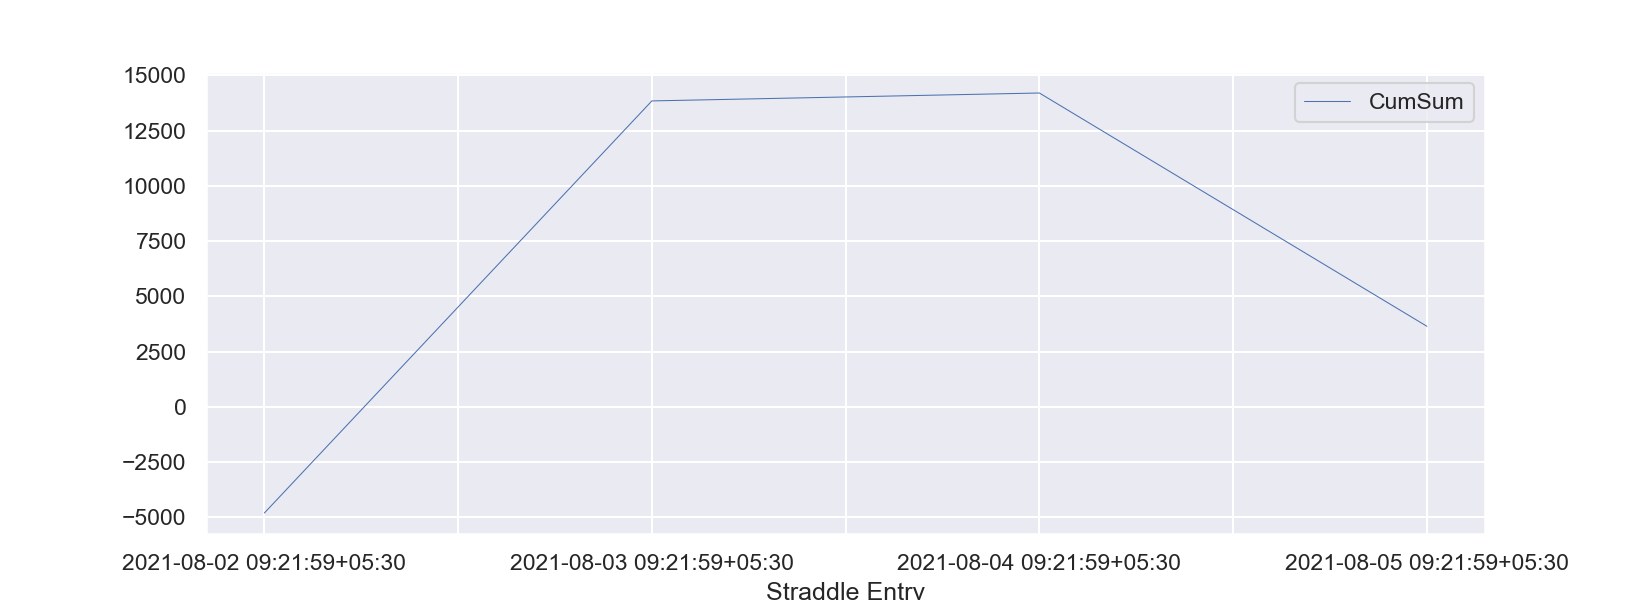

In [25]:
df2.plot(linewidth=0.5)
plt.show()

In [17]:
def func():
    from datetime import datetime
    import backtrader as bt

    class ShortStraddle(bt.Strategy):


        def __init__(self):

            # ----------------------------------------------------------------------------------------
            # Declare all the variables required in the strategy here

            self.dataclose = self.datas[0].close
            self.order = None
            self.price = None

            # ----------------------------------------------------------------------------------------


            self.Statistics = pd.DataFrame(columns = ['Trade Open', 'Trade Close', 'Gross PnL', 'Net PnL', 'MaxDrawDown'])


        def log(self, txt, dt=None):
            dt = dt or self.datas[0].datetime.date(0)
            #print(f'{dt.isoformat()} {txt}') #Print date and close #Print date and close

        def next(self):
            #self.log('Close, %.2f' % self.dataclose[0])

            # ----------------------------------------------------------------------------------------
            # Write the strategy logic here

            if self.order:
                return
            if str(self.data.datetime.time()) == '09:20:59':
                self.price = self.dataclose[0]
                self.order = self.sell(size = 75)
            if self.position:
                if str(self.data.datetime.time()) == '15:00:59':
                    self.order = self.buy(size = 75)

                elif self.dataclose[0] > 1.2*self.price:
                    self.order = self.buy(size = 75)

            # ----------------------------------------------------------------------------------------

        def notify_order(self, order):
            if order.status in [order.Submitted, order.Accepted]:
            # An active Buy/Sell order has been submitted/accepted - Nothing to do
                return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
            if order.status in [order.Completed]:
                if order.isbuy():
                    self.log(f'BUY EXECUTED, {order.executed.price:.2f}')
                elif order.issell():
                    self.log(f'SELL EXECUTED, {order.executed.price:.2f}')
                self.bar_executed = len(self)

            elif order.status in [order.Canceled, order.Margin, order.Rejected]:
                self.log('Order Canceled/Margin/Rejected')

            # Reset orders
            self.order = None

        def notify_trade(self, trade):
            if not trade.isclosed:
                return

            d1 = str(bt.num2date(trade.dtopen)) + '+05:30'
            d2 = str(bt.num2date(trade.dtclose)) + '+05:30'
            C = pe['close']
            D = C.loc[d1:d2]
            maxdd = max_dd(D)
            if math.isnan(maxdd):
                self.Statistics.loc[len(self.Statistics.index)] = [d1, d2, trade.pnl, trade.pnlcomm, "Data Missing"]
            else:
                self.Statistics.loc[len(self.Statistics.index)] = [d1, d2, trade.pnl, trade.pnlcomm, maxdd]

    def max_dd(ser):
        max2here = ser.cummax()
        dd2here = (ser - max2here)/max2here
        return abs(dd2here.min()*100)

    def printTradeAnalysis(analyzer):
        total_open = analyzer.total.open
        total_closed = analyzer.total.closed
        total_won = analyzer.won.total
        total_lost = analyzer.lost.total
        win_streak = analyzer.streak.won.longest
        lose_streak = analyzer.streak.lost.longest
        pnl_net = round(analyzer.pnl.net.total,2)
        strike_rate = round((total_won / total_closed) * 100, 2)
        #Designate the rows
        h1 = ['Total Open', 'Total Closed', 'Total Won', 'Total Lost']
        h2 = ['Strike Rate','Win Streak', 'Losing Streak', 'PnL Net']
        r1 = [total_open, total_closed,total_won,total_lost]
        r2 = [strike_rate, win_streak, lose_streak, pnl_net]
        #Check which set of headers is the longest.
        if len(h1) > len(h2):
            header_length = len(h1)
        else:
            header_length = len(h2)
        #Print the rows
        print_list = [h1,r1,h2,r2]
        row_format ="{:<15}" * (header_length + 1)
        print("Trade Analysis Results:")
        for row in print_list:
            print(row_format.format('',*row))

    def printSQN(analyzer):
        sqn = round(analyzer.sqn,2)
        print('SQN: {}'.format(sqn))

    cerebro = bt.Cerebro()
    cerebro.addstrategy(ShortStraddle)

    data = bt.feeds.PandasData(dataname = ce)
    cerebro.adddata(data)
    cerebro.broker.setcash(int(cash))
    cerebro.broker.setcommission(commission = (float(brokerage))/100)

    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
    cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")
    cerebro.addsizer(bt.sizers.SizerFix, stake=3)
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, timeframe=bt.TimeFrame.Days, compression=1, factor=365, annualize=True)

    if __name__ == '__main__':
        # Run Cerebro Engine
        start_portfolio_value = cerebro.broker.getvalue()

        strategies = cerebro.run()
        firstStrat = strategies[0]
        #b = Bokeh(style='bar', plot_mode='single')
        cerebro.plot()

        #print(firstStrat.Statistics)
        printTradeAnalysis(firstStrat.analyzers.ta.get_analysis())
        printSQN(firstStrat.analyzers.sqn.get_analysis())

        end_portfolio_value = cerebro.broker.getvalue()
        pnl = end_portfolio_value - start_portfolio_value
        print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
        print(f'Final Portfolio Value: {end_portfolio_value:2f}')
        print(f'PnL: {pnl:.2f}')
        print('Sharpe Ratio: ', firstStrat.analyzers.sharperatio.get_analysis()['sharperatio'])

<IPython.core.display.Javascript object>


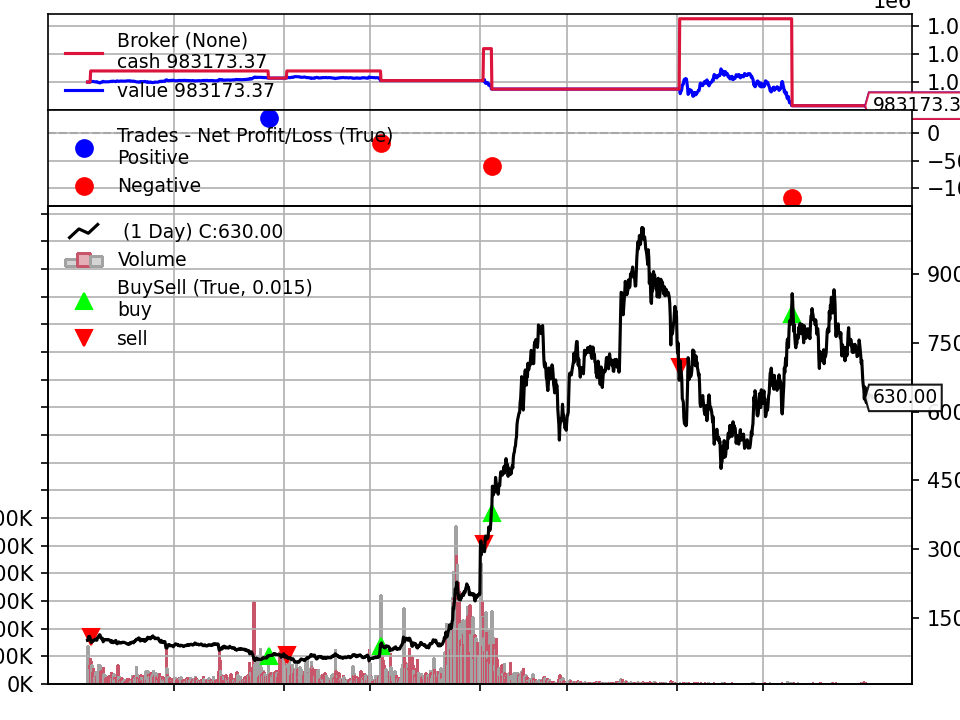

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              4              1              3              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               25.0           1              3              -16826.63      
SQN: -1.56
Starting Portfolio Value: 1000000.000000
Final Portfolio Value: 983173.367500
PnL: -16826.63
Sharpe Ratio:  -14.953058629264609


<IPython.core.display.Javascript object>


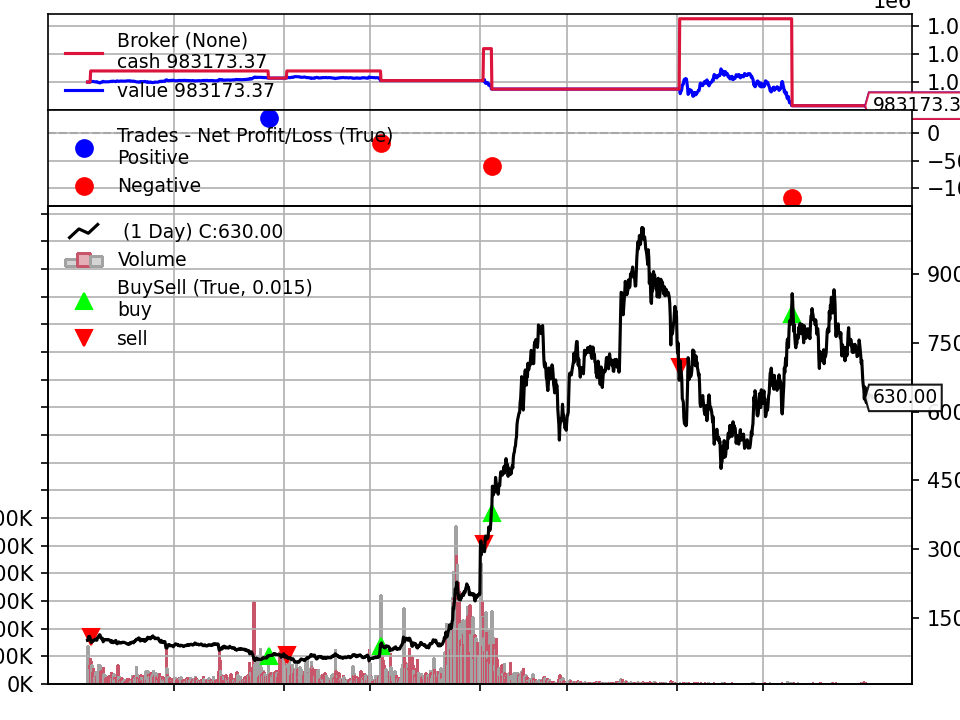

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              4              1              3              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               25.0           1              3              -16826.63      
SQN: -1.56
Starting Portfolio Value: 1000000.000000
Final Portfolio Value: 983173.367500
PnL: -16826.63
Sharpe Ratio:  -14.953058629264609


<IPython.core.display.Javascript object>


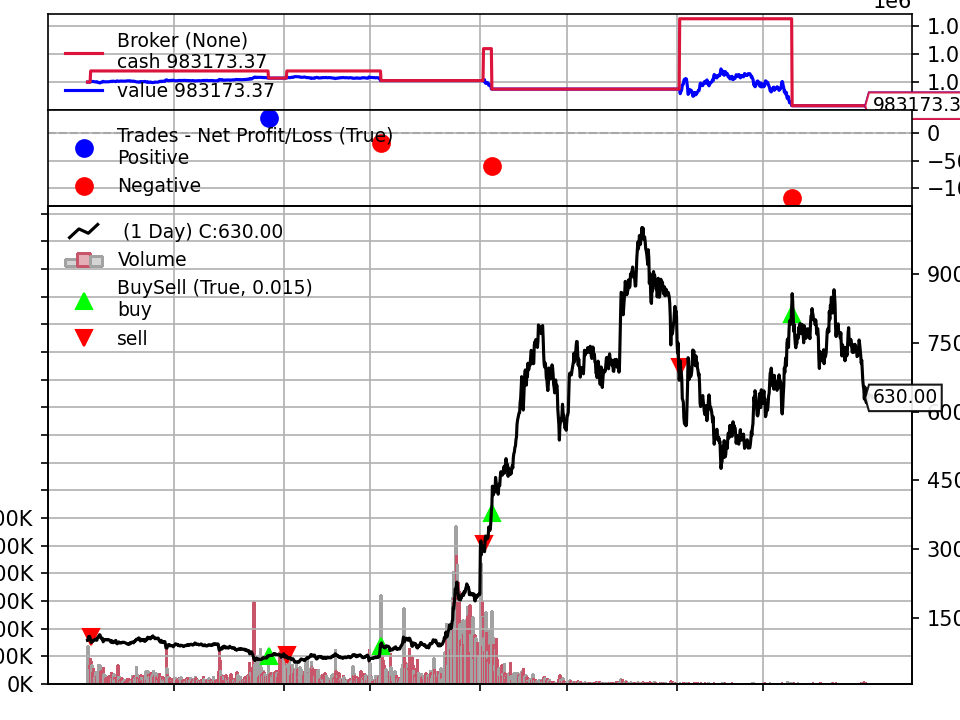

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              4              1              3              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               25.0           1              3              -16826.63      
SQN: -1.56
Starting Portfolio Value: 1000000.000000
Final Portfolio Value: 983173.367500
PnL: -16826.63
Sharpe Ratio:  -14.953058629264609


<IPython.core.display.Javascript object>


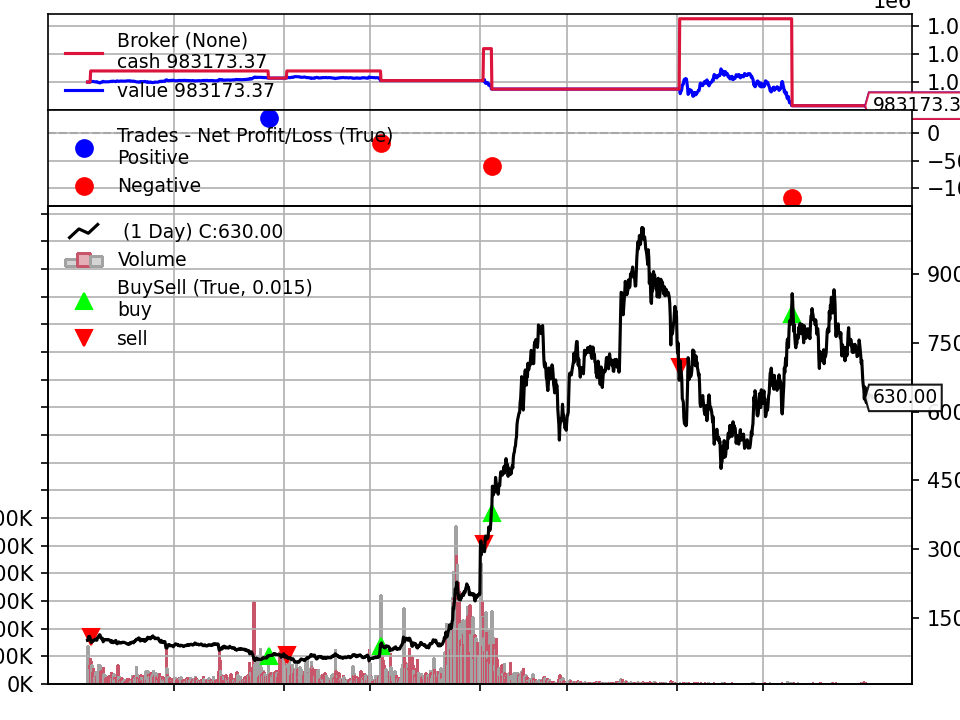

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              4              1              3              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               25.0           1              3              -16826.63      
SQN: -1.56
Starting Portfolio Value: 1000000.000000
Final Portfolio Value: 983173.367500
PnL: -16826.63
Sharpe Ratio:  -14.953058629264609


<IPython.core.display.Javascript object>


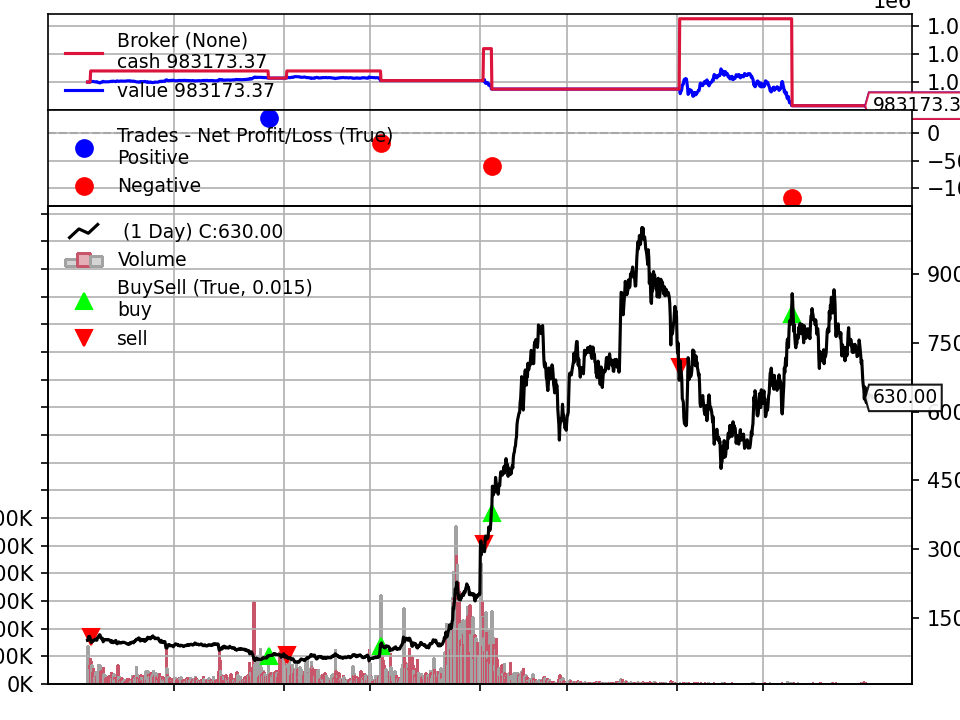

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              4              1              3              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               25.0           1              3              -16826.63      
SQN: -1.56
Starting Portfolio Value: 1000000.000000
Final Portfolio Value: 983173.367500
PnL: -16826.63
Sharpe Ratio:  -14.953058629264609


<IPython.core.display.Javascript object>


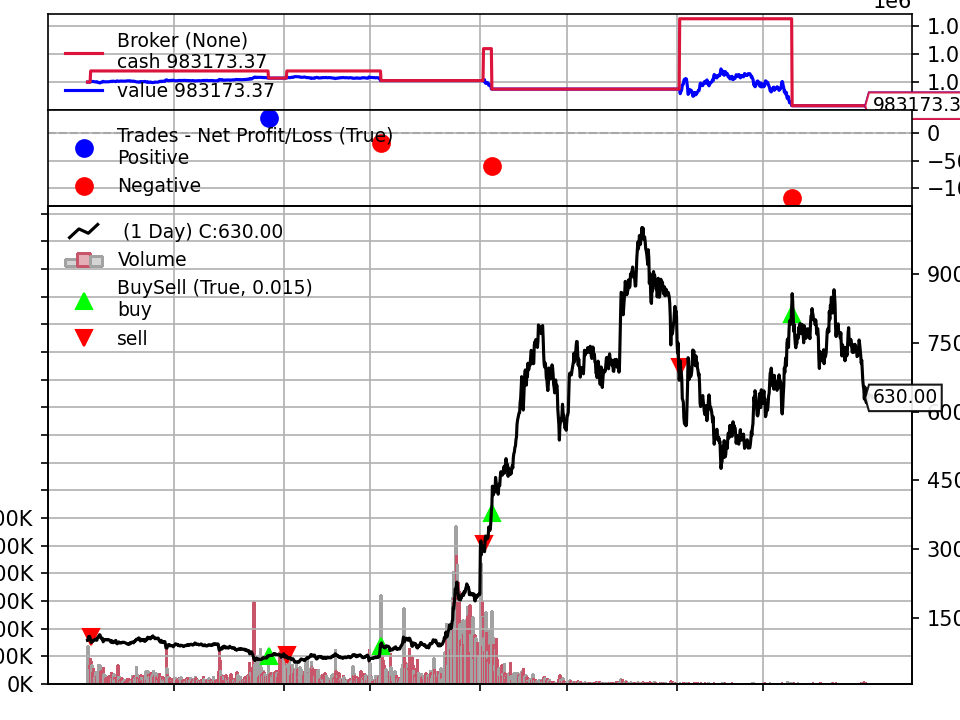

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              4              1              3              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               25.0           1              3              -16826.63      
SQN: -1.56
Starting Portfolio Value: 1000000.000000
Final Portfolio Value: 983173.367500
PnL: -16826.63
Sharpe Ratio:  -14.953058629264609


<IPython.core.display.Javascript object>


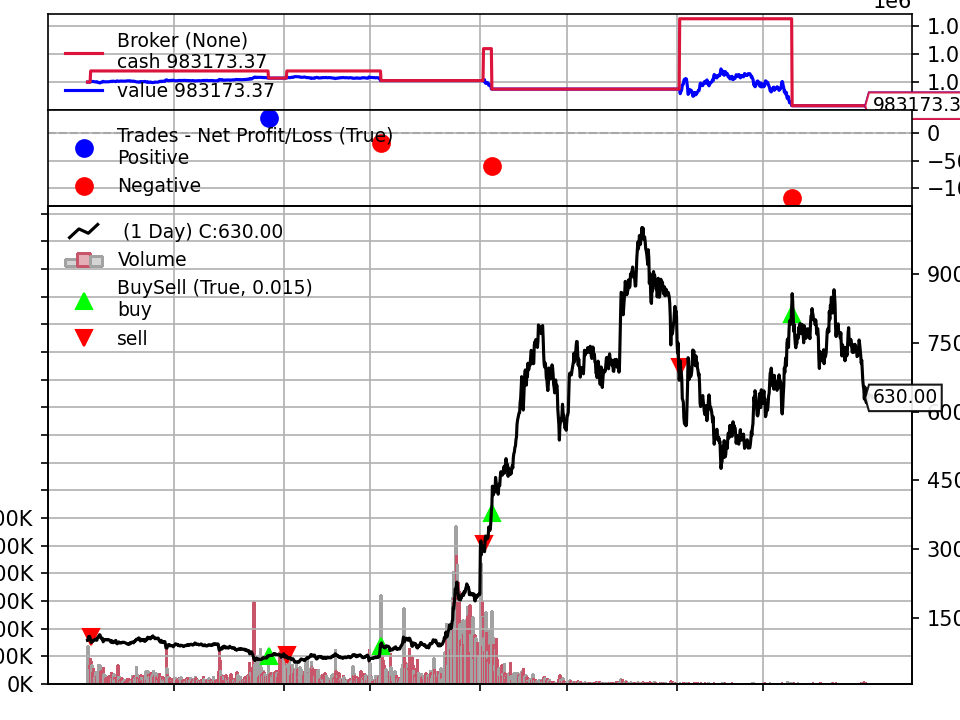

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              4              1              3              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               25.0           1              3              -16826.63      
SQN: -1.56
Starting Portfolio Value: 1000000.000000
Final Portfolio Value: 983173.367500
PnL: -16826.63
Sharpe Ratio:  -14.953058629264609


<IPython.core.display.Javascript object>


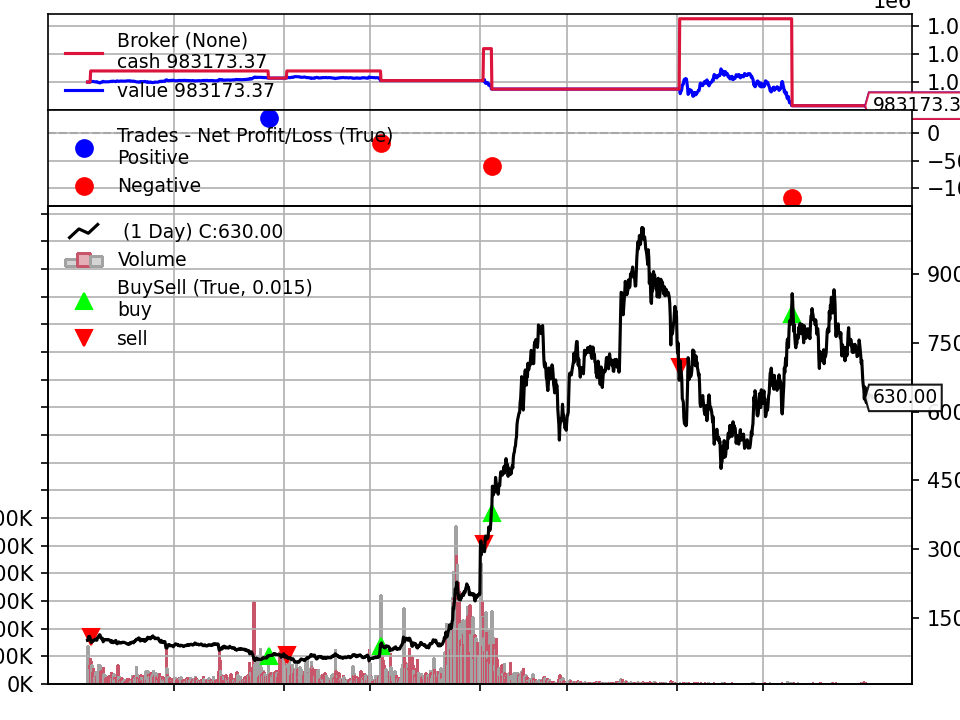

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              4              1              3              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               25.0           1              3              -16826.63      
SQN: -1.56
Starting Portfolio Value: 1000000.000000
Final Portfolio Value: 983173.367500
PnL: -16826.63
Sharpe Ratio:  -14.953058629264609
735 ms ± 182 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit func()